# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [16]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import requests
from PIL import Image
from io import BytesIO

# Fetch the image from Picsum API
url = "https://picsum.photos/200"
response = requests.get(url)

# Load image with PIL
img = Image.open(BytesIO(response.content))

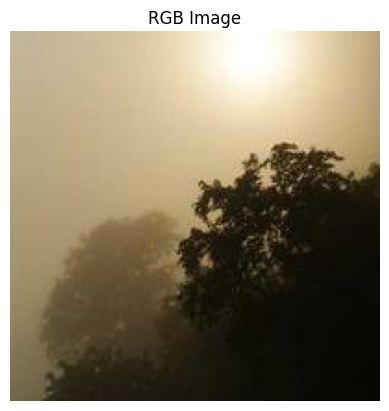

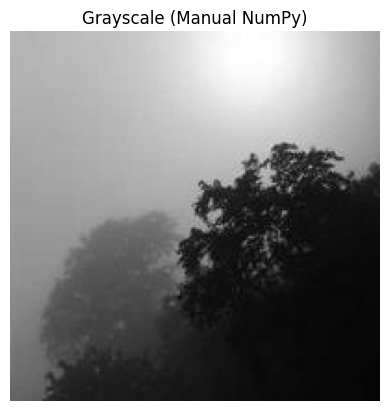

RGB image shape:      (200, 200, 3)
Manual gray shape:    (200, 200)

Sample RGB pixel at (0,0): [195 181 152]
Manual gray pixel at (0,0): 181


In [17]:
import numpy as np
from matplotlib import pyplot as plt
# Convert PIL → NumPy (RGB)
rgb_img = np.array(img)
plt.imshow(rgb_img)
plt.title("RGB Image")
plt.axis("off")
plt.show()

manual_gray = (0.299 * rgb_img[:, :, 0] +
               0.587 * rgb_img[:, :, 1] +
               0.114 * rgb_img[:, :, 2]).astype(np.uint8)
# Display grayscale (manual)
plt.imshow(manual_gray, cmap='gray')
plt.title("Grayscale (Manual NumPy)")
plt.axis("off")
plt.show()
print("RGB image shape:     ", rgb_img.shape)
print("Manual gray shape:   ", manual_gray.shape)
print("\nSample RGB pixel at (0,0):", rgb_img[0, 0])
print("Manual gray pixel at (0,0):", manual_gray[0, 0])

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [18]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

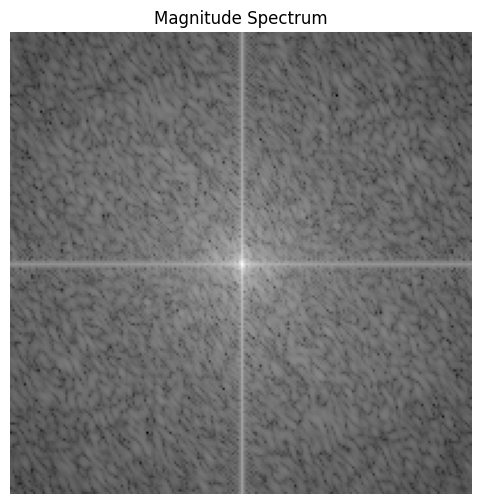

FFT shape: (200, 200)
Magnitude shape: (200, 200)
Phase shape: (200, 200)


In [19]:
f = np.fft.fft2(manual_gray)
fshift = np.fft.fftshift(f)
magnitude = np.abs(fshift)
phase = np.angle(fshift)
plt.figure(figsize=(8,6))
plt.imshow(np.log1p(magnitude), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()
print("FFT shape:", f.shape)
print("Magnitude shape:", magnitude.shape)
print("Phase shape:", phase.shape)

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [20]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
img = manual_gray
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

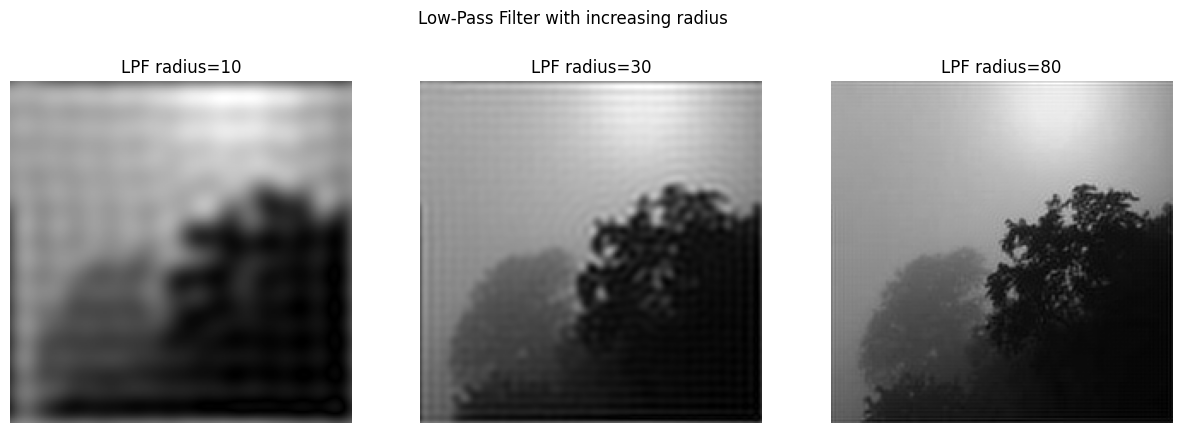

In [21]:
radii = [10, 30, 80]  # radii in pixels
plt.figure(figsize=(15,5))

for i, radius in enumerate(radii):
    # 1) Create circular mask
    mask = np.zeros((rows, cols), dtype=np.float32)
    y, x = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - ccol)**2 + (y - crow)**2)
    mask[distance <= radius] = 1  # circular low-pass mask

    # 2) Apply mask to shifted FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift_masked = fshift * mask

    # 3) Reconstruct image
    f_ishift = np.fft.ifftshift(fshift_masked)
    img_recon = np.fft.ifft2(f_ishift)
    img_recon = np.abs(img_recon)

    # 4) Show reconstructed image
    plt.subplot(1, len(radii), i+1)
    plt.imshow(img_recon, cmap='gray')
    plt.title(f'LPF radius={radius}')
    plt.axis('off')

    # Comment: Smaller radius → removes more high frequencies → blurrier image
plt.suptitle("Low-Pass Filter with increasing radius")
plt.show()


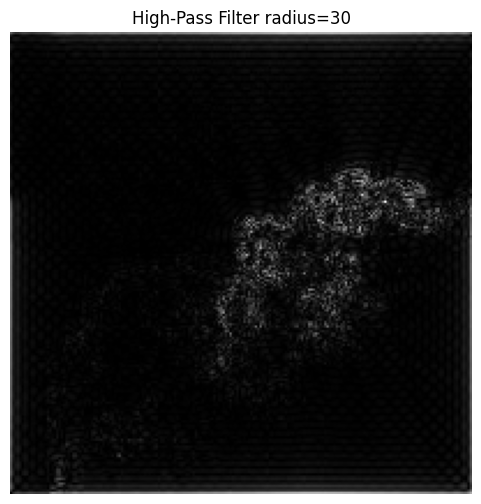

In [22]:
radius_hpf = 30
mask_hpf = np.ones((rows, cols), dtype=np.float32)
y, x = np.ogrid[:rows, :cols]
distance = np.sqrt((x - ccol)**2 + (y - crow)**2)
mask_hpf[distance <= radius_hpf] = 0  # zero out low frequencies

# Apply HPF
fshift_hpf = np.fft.fftshift(np.fft.fft2(img)) * mask_hpf
img_hpf = np.fft.ifft2(np.fft.ifftshift(fshift_hpf))
img_hpf = np.abs(img_hpf)

plt.figure(figsize=(6,6))
plt.imshow(img_hpf, cmap='gray')
plt.title(f"High-Pass Filter radius={radius_hpf}")
plt.axis('off')
plt.show()

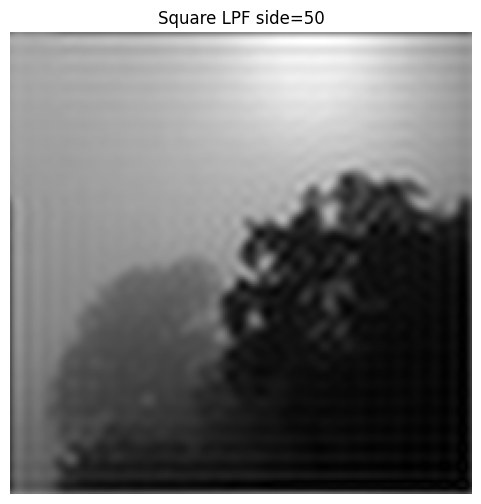

In [23]:
side = 50
mask_square = np.zeros((rows, cols), dtype=np.float32)
start_row = crow - side // 2
end_row = crow + side // 2
start_col = ccol - side // 2
end_col = ccol + side // 2
mask_square[start_row:end_row, start_col:end_col] = 1

# Apply square LPF
fshift_square = np.fft.fftshift(np.fft.fft2(img)) * mask_square
img_square = np.fft.ifft2(np.fft.ifftshift(fshift_square))
img_square = np.abs(img_square)

plt.figure(figsize=(6,6))
plt.imshow(img_square, cmap='gray')
plt.title(f"Square LPF side={side}")
plt.axis('off')
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [24]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
img = manual_gray
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

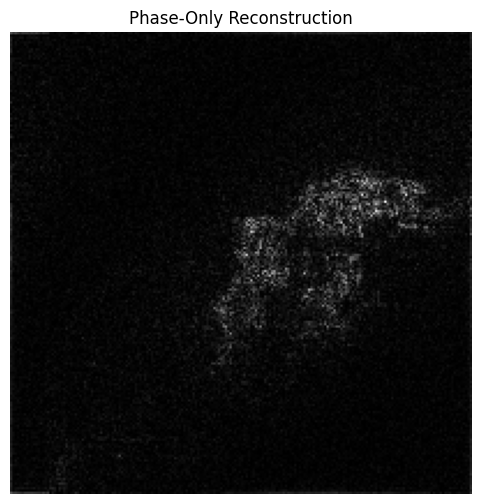

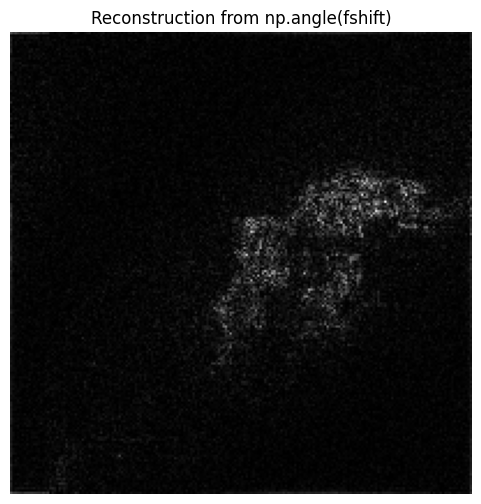

In [25]:
phase_only = fshift / (np.abs(fshift) )

# Reconstruct image from phase-only
img_phase_recon = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase_recon = np.abs(img_phase_recon)

plt.figure(figsize=(6,6))
plt.imshow(img_phase_recon, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis('off')
plt.show()

# phase_only = fshift / np.abs(fshift) keeps phase, sets magnitude=1
# np.angle(fshift) only returns the phase angles in radians (not complex number)

phase_angles = np.angle(fshift)
img_phase_angle = np.fft.ifft2(np.fft.ifftshift(np.exp(1j * phase_angles)))
img_phase_angle = np.abs(img_phase_angle)

plt.figure(figsize=(6,6))
plt.imshow(img_phase_angle, cmap='gray')
plt.title("Reconstruction from np.angle(fshift)")
plt.axis('off')
plt.show()
# Comment: visually, this is almost identical to phase-only above because magnitude was set to 1

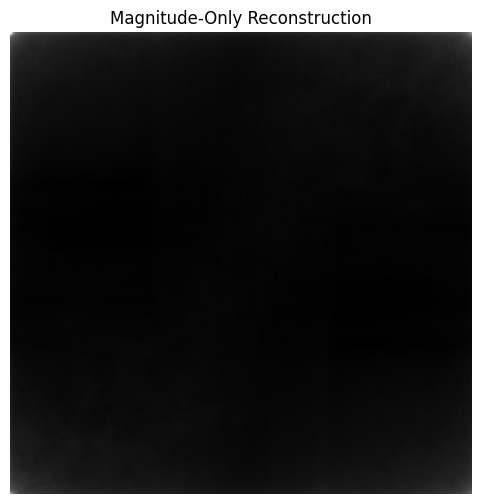

In [26]:
mag_only = np.abs(fshift)  # keep magnitude, discard phase by setting phase=0
# Combine magnitude with zero phase
mag_only_complex = mag_only * np.exp(1j * 0)  # zero phase

img_mag_recon = np.fft.ifft2(np.fft.ifftshift(mag_only_complex))
img_mag_recon = np.abs(img_mag_recon)

plt.figure(figsize=(6,6))
plt.imshow(img_mag_recon, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis('off')
plt.show()

# 1) Logarithm in Magnitude Spectrum (np.log1p(magnitude)) is for visualization only.
#    Without log, a few high magnitude frequencies dominate the display and small values are invisible.
# 2) Magnitude-only reconstruction looks very blurry and unrecognizable because phase encodes
#    structural/positional information. Magnitude alone is not enough to reconstruct the spatial patterns.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

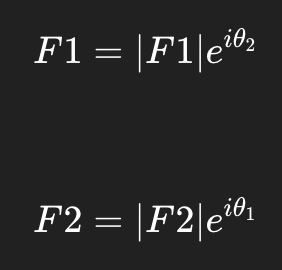

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [27]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

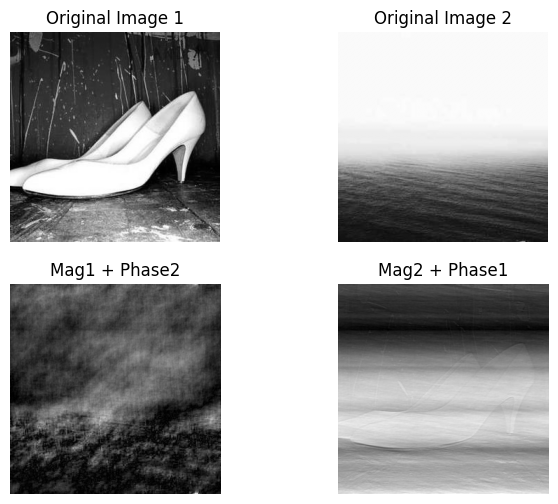

In [28]:
url1 = "https://picsum.photos/300"  # random image 1
response1 = requests.get(url1)
img1 = Image.open(BytesIO(response1.content)).convert('L')  # grayscale
img1 = np.array(img1)
url2 = "https://picsum.photos/300"  # random image 2
response2 = requests.get(url2)
img2 = Image.open(BytesIO(response2.content)).convert('L')  # grayscale
img2 = np.array(img2)

f1 = np.fft.fft2(img1)
f1_shift = np.fft.fftshift(f1)
mag1 = np.abs(f1_shift)
phase1 = np.angle(f1_shift)

f2 = np.fft.fft2(img2)
f2_shift = np.fft.fftshift(f2)
mag2 = np.abs(f2_shift)
phase2 = np.angle(f2_shift)

# Image: mag1 + phase2
combined1 = mag1 * np.exp(1j * phase2)
recon1 = np.fft.ifft2(np.fft.ifftshift(combined1))
recon1 = np.abs(recon1)
# Image: mag2 + phase1
combined2 = mag2 * np.exp(1j * phase1)
recon2 = np.fft.ifft2(np.fft.ifftshift(combined2))
recon2 = np.abs(recon2)

plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img2, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(recon1, cmap='gray')
plt.title("Mag1 + Phase2")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(recon2, cmap='gray')
plt.title("Mag2 + Phase1")
plt.axis('off')

# - Image with Phase2 (from Image2) mostly looks like Image2; structure is controlled by phase.
# - Image with Phase1 mostly looks like Image1, magnitude mostly controls contrast/texture.
# - This demonstrates that phase carries spatial structure, while magnitude controls intensity/energy.